# 분석목표 
- 마케팅별 적용 효과 확인 및 향후 전략제안

# 세부분석
- 성공적인 마케팅 방법 도출
- 고객의 평균소비패턴 확인
- 매출이 높은 제품 확인
- 실적이 낮은

# Part_0. Dataset 불러오기 / Library 설치

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
# # 한글호환
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # eli5설치
# !pip install eli5

# # shap설치
# !pip install shap

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
sns.set(style='darkgrid')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning or RuntimeWarning)
import tensorflow as tf
import sklearn
import math
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import eli5
from eli5.sklearn import PermutationImportance
import shap

In [80]:
df_raw = pd.read_csv('/content/drive/MyDrive/CP1/CP1_Marketing_data_2.csv')
df = df_raw.sort_values(by='ID' ,ascending=True).reset_index(drop=True)

In [81]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,0,1985,Graduation,Married,"70,951.00",0,0,2005-04-13,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,0,SA
1,1,1961,Graduation,Single,"57,091.00",0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,9,1975,Master,Single,"46,098.00",1,1,8/18/12,86,57,0,27,0,0,36,4,3,2,2,8,0,0,0,0,0,0,0,CA
3,13,1947,PhD,Widow,"25,358.00",0,1,7/22/13,57,19,0,5,0,0,8,2,1,0,3,6,0,0,0,0,0,0,0,SA
4,17,1971,PhD,Married,"60,491.00",0,1,2009-06-13,81,637,47,237,12,19,76,4,6,11,7,5,0,0,0,0,0,0,0,SP


In [82]:
df.shape

(2240, 28)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

# Introduce Column
### Customer information
    * ID - 고객 고유번호
    * Year_Birth - 고객의 출생년도
    * Education - 고객의 교육 수준
      (Graduation, Master, PhD, 2n Cycle, Basic)
    * Marital status - 고객의 결혼 상태
      (Married, Single, Widow, Divorce, Together, Alone, YOLO, Absurd)
    * Income - 고객의 연간 가구 소득
    * Kidhome - 고객 가정의 미취학아동 수
    * Teenhome - 고객 가정의 청소년 수
    * Dt_Customer - 고객 등록일
    * Recency - 마지막 구매 이후의 일수
    * Country - 고객의 국적
      (SA, CA, SP, GER, IND, US, AUS)
    * Complain - 고객의 불만 제기여부

### Purchase Type
    * MntWines - 지난 2년 동안 와인에 지출한 금액
    * MntFruits - 지난 2년 동안 과일에 지출한 금액
    * MntMeatProducts - 지난 2년 동안 육류 제품에 지출한 금액
    * MntFishProducts - 지난 2년 동안 생선 제품에 지출한 금액
    * MntSweetProducts - 지난 2년 동안 달콤한 제품에 지출한 금액
    * MntGoldProds - 지난 2년 동안 금 제품에 지출한 금액

### Purchase Place
    * NumWebPurchases - 회사 웹 사이트를 통한 구매 횟수
    * NumCatalogPurchases - 카탈로그를 통한 구매 횟수 
    * NumStorePurchases - 매장에서 구매한 횟수
    * NumWebVisitsMonth - 지난 달 회사 웹 사이트를 방문한 횟수
    * NumDealsPurchases - 할인율을 적용하여 구매한 횟수

### Marketing Type
    * AcceptedCmp1 - 고객의 1번째 캠페인 수락 여부 
    * AcceptedCmp2 - 고객의 2번째 캠페인 수락 여부 
    * AcceptedCmp3 - 고객의 3번째 캠페인 수락 여부 
    * AcceptedCmp4 - 고객의 4번째 캠페인 수락 여부 
    * AcceptedCmp5 - 고객의 5번째 캠페인 수락 여부 
    * Response - 고객의 마지막 캠페인 수락 여부 


# Part_1. Exploratory Data Analysis(탐색적 데이터 분석)

## Part_1.1 Data Clining (missing value, outlier handling)

In [84]:
df = df[sorted(df.columns)]
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.head()

,Income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country,Dt_Customer,Education,ID,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Year_Birth
0,"70,951.00",0,0,0,0,0,0,SA,2005-04-13,Graduation,0,0,Married,254,10,54,554,87,239,4,1,9,3,1,66,0,0,1985
1,"57,091.00",0,1,0,0,0,0,CA,6/15/14,Graduation,1,0,Single,7,5,37,64,0,464,3,1,7,7,5,0,1,0,1961
2,"46,098.00",0,0,0,0,0,0,CA,8/18/12,Master,9,1,Single,0,0,36,27,0,57,2,4,2,3,8,86,0,1,1975
3,"25,358.00",0,0,0,0,0,0,SA,7/22/13,PhD,13,0,Widow,0,0,8,5,0,19,0,2,3,1,6,57,0,1,1947
4,"60,491.00",0,0,0,0,0,0,SP,2009-06-13,PhD,17,0,Married,12,47,76,237,19,637,11,4,7,6,5,81,0,1,1971


In [85]:
# column명의 공백을 제거
df.columns = df.columns.str.replace(' ', '')

# Income column의 특수문자($) 제거
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')

# Year_Birth column을 Age로 변경
df = df.rename(columns={'Year_Birth':'Age'})
df['Age'] = 2022-df['Age']

# 국가명을 보다 알아보기 쉽게 변경
df['Country'] = df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

In [86]:
df.head()

,Income,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Complain,Country,Dt_Customer,Education,ID,Kidhome,Marital_Status,MntFishProducts,MntFruits,MntGoldProds,MntMeatProducts,MntSweetProducts,MntWines,NumCatalogPurchases,NumDealsPurchases,NumStorePurchases,NumWebPurchases,NumWebVisitsMonth,Recency,Response,Teenhome,Age
0,70951.0,0,0,0,0,0,0,ZAF,2005-04-13,Graduation,0,0,Married,254,10,54,554,87,239,4,1,9,3,1,66,0,0,37
1,57091.0,0,1,0,0,0,0,CAN,6/15/14,Graduation,1,0,Single,7,5,37,64,0,464,3,1,7,7,5,0,1,0,61
2,46098.0,0,0,0,0,0,0,CAN,8/18/12,Master,9,1,Single,0,0,36,27,0,57,2,4,2,3,8,86,0,1,47
3,25358.0,0,0,0,0,0,0,ZAF,7/22/13,PhD,13,0,Widow,0,0,8,5,0,19,0,2,3,1,6,57,0,1,75
4,60491.0,0,0,0,0,0,0,ESP,2009-06-13,PhD,17,0,Married,12,47,76,237,19,637,11,4,7,6,5,81,0,1,51


In [87]:
df.isnull().sum().sort_values(ascending=False)
# Income column에 24개 null값

Income                 24
AcceptedCmp1            0
Teenhome                0
Response                0
Recency                 0
NumWebVisitsMonth       0
NumWebPurchases         0
NumStorePurchases       0
NumDealsPurchases       0
NumCatalogPurchases     0
MntWines                0
MntSweetProducts        0
MntMeatProducts         0
MntGoldProds            0
MntFruits               0
MntFishProducts         0
Marital_Status          0
Kidhome                 0
ID                      0
Education               0
Dt_Customer             0
Country                 0
Complain                0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
AcceptedCmp2            0
Age                     0
dtype: int64

In [88]:
for i in df.columns : 
  if df[i].dtype == int : 
    print(f"'{i}'", end = ', ')

'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain', 'ID', 'Kidhome', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'Recency', 'Response', 'Teenhome', 'Age', 

In [89]:
numeric_columns = ['Income', 'Age', 'Kidhome', 'Teenhome']
Mnt_columns = ['MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines']
Num_columns = ['NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth']


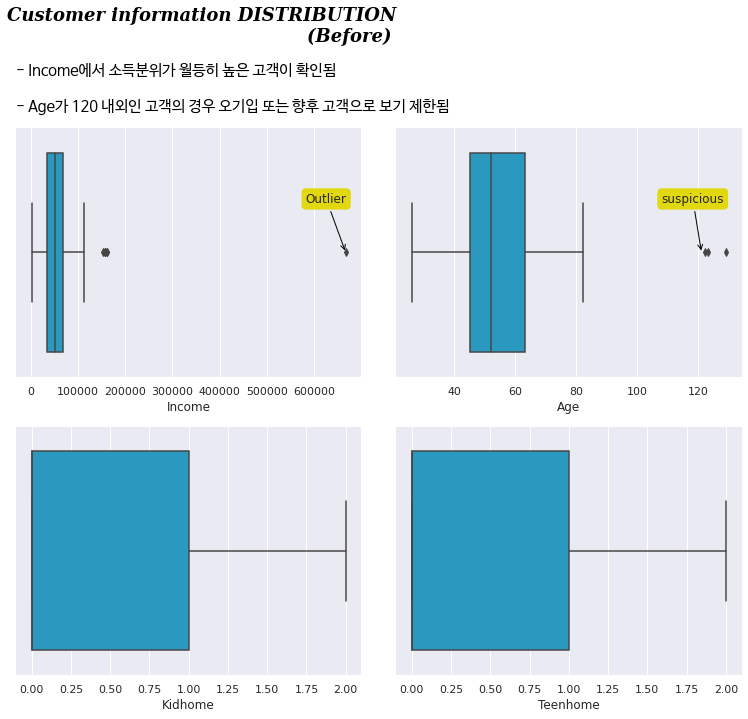

In [90]:
col_dist = numeric_columns
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.95, wspace=0.1, hspace=0.2)
ax = ax.flatten()

for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')
ax[0].annotate('Outlier',
            xy=(df['Income'].max(), 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[1].annotate('suspicious',
            xy=(121, 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)


fig.text(0.05, 1.1, '''Customer information DISTRIBUTION
                                                (Before)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.98, 
         '''
- Income에서 소득분위가 월등히 높은 고객이 확인됨

- Age가 120 내외인 고객의 경우 오기입 또는 향후 고객으로 보기 제한됨''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

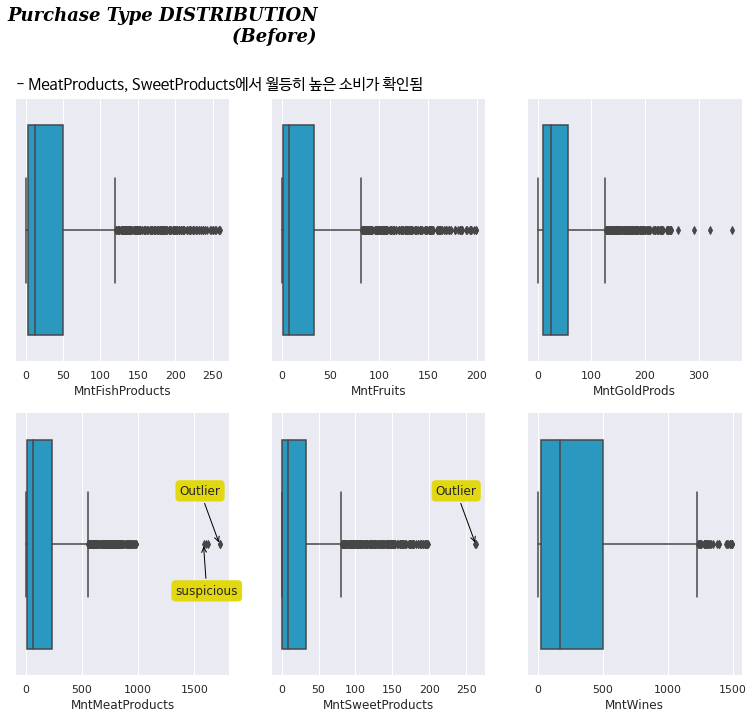

In [91]:
col_dist = Mnt_columns
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=1, wspace=0.2, hspace=0.2)
ax = ax.flatten()

for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')

ax[3].annotate('suspicious',
            xy=(1582, 0),
            xycoords='data',
            xytext=(-28,-50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[3].annotate('Outlier',
            xy=(df['MntMeatProducts'].max(), 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[4].annotate('Outlier',
            xy=(df['MntSweetProducts'].max(), 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)
        
fig.text(0.05, 1.1, '''Purchase Type DISTRIBUTION
                                    (Before)''',
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 1.02, 
         '- MeatProducts, SweetProducts에서 월등히 높은 소비가 확인됨',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show()

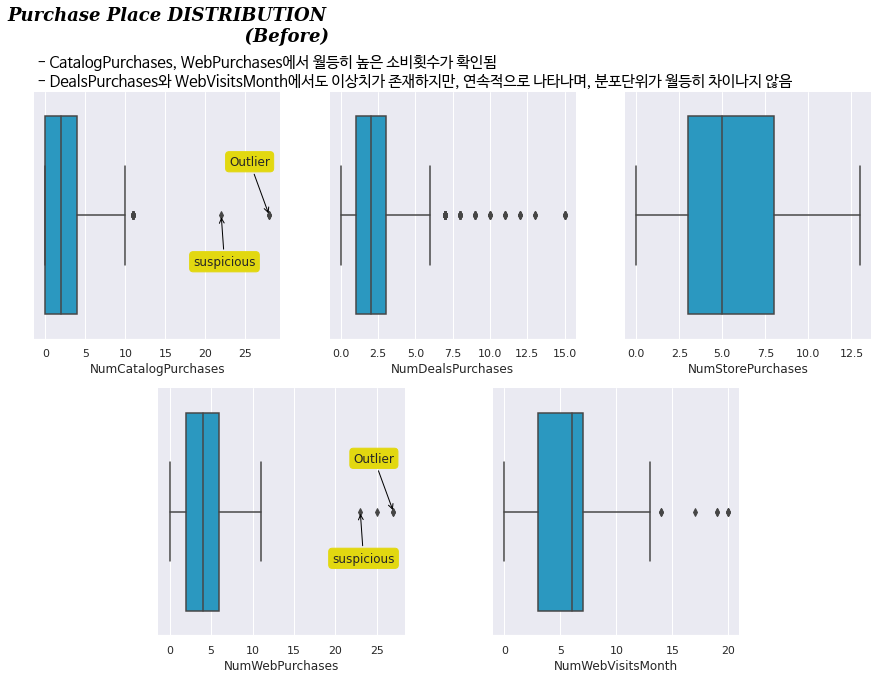

In [92]:
col_dist = Num_columns
fig, ax = plt.subplots(2,3, figsize=(15,10))

ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.125,0.228,0.343])
ax[1][1].set_position([0.55,0.125,0.228,0.343])

ax = ax.flatten()

for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

bbox_args = dict(boxstyle="round", fc="#e2d810", color = '#e2d810')

ax[0].annotate('suspicious',
            xy=(22, 0),
            xycoords='data',
            xytext=(-28,-50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[0].annotate('Outlier',
            xy=(df['NumCatalogPurchases'].max(), 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[3].annotate('suspicious',
            xy=(23, 0),
            xycoords='data',
            xytext=(-28,-50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)

ax[3].annotate('Outlier',
            xy=(df['NumWebPurchases'].max(), 0),
            xycoords='data',
            xytext=(-40,50),
            textcoords='offset points',
            arrowprops=dict(arrowstyle = '->', color = 'black'),
            fontsize=12, bbox=bbox_args)
        
fig.text(0.10, 0.95, '''Purchase Place DISTRIBUTION
                                      (Before)''',
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.10, 0.89, 
         '''
         - CatalogPurchases, WebPurchases에서 월등히 높은 소비횟수가 확인됨
         - DealsPurchases와 WebVisitsMonth에서도 이상치가 존재하지만, 연속적으로 나타나며, 분포단위가 월등히 차이나지 않음''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show()

In [93]:
# Income
df['Income'].describe().T

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [94]:
# Income Column 사분위수 기반 이상치 제거
for value in df['Income'] :
    condition = df['Income']> df['Income'].quantile(0.75) + 1.5 * (df['Income'].quantile(0.75) - df['Income'].quantile(0.25))
    idx = df[condition].index
    df.drop(idx, inplace=True);

print(df_raw.shape, df.shape)

(2240, 28) (2232, 28)


In [95]:
# 이상치 제거 후 Income column의 missing value 중앙값 대체
#(이상치 제거 없이 대체하기엔 중앙값 변동이 클 것 같다.)
df['Income'] = df['Income'].fillna(df['Income'].median())

In [96]:
# 100세 이상 고객의 경우 오기입 or 향후 지속방문 고객이 아닐 가능성이 높기에 배제
df = df[df['Age'] < 99].reset_index(drop=True)

In [97]:
# MntMeatProducts에서 월등히 높은 소비들을 제거
df = df[df['MntMeatProducts'] < 1582].reset_index(drop=True)

# MntSweetProducts에서 월등히 높은 소비들을 제거
df = df[df['MntSweetProducts'] < 250].reset_index(drop=True)

In [98]:
# NumCatalogPurchases에서 월등히 높은 소비횟수 제거
df = df[df['NumCatalogPurchases'] < 20].reset_index(drop=True)

# NumWebPurchases에서 월등히 높은 소비횟수 제거
df = df[df['NumWebPurchases'] < 20].reset_index(drop=True)

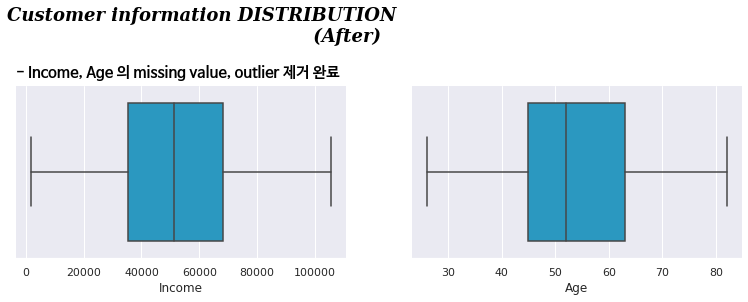

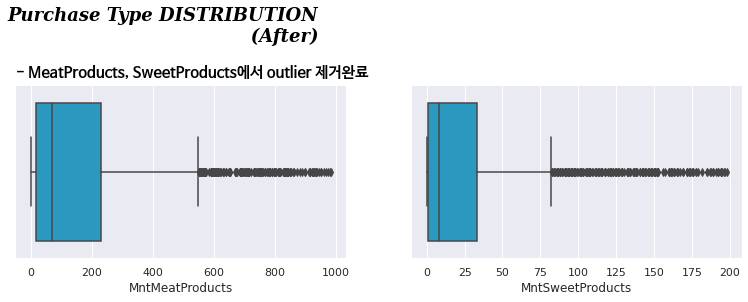

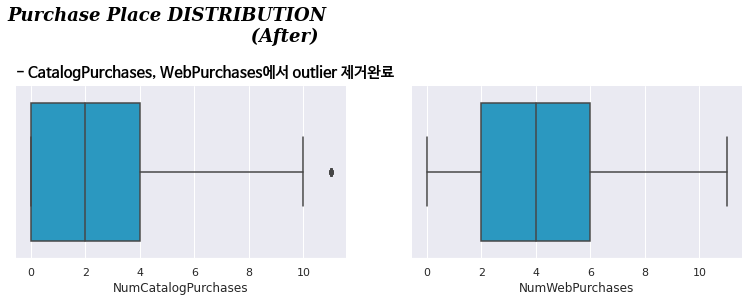

In [99]:
col_dist = ["Income", "Age"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.4, wspace=0.2)
ax = ax.flatten()


for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

fig.text(0.05, 0.5, '''Customer information DISTRIBUTION
                                                 (After)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.42, '- Income, Age 의 missing value, outlier 제거 완료',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

############################

col_dist = ["MntMeatProducts", "MntSweetProducts"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.4, wspace=0.2)
ax = ax.flatten()

for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

fig.text(0.05, 0.5, '''Purchase Type DISTRIBUTION
                                       (After)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.42, '- MeatProducts, SweetProducts에서 outlier 제거완료',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")
############################

col_dist = ["NumCatalogPurchases", "NumWebPurchases"]
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.4, wspace=0.2)
ax = ax.flatten()

for ind, col in enumerate(col_dist):
    sns.boxplot(x = df[col], ax = ax[ind], color = '#12a4d9')
    for s in ['top', 'right', 'left']:
        ax[ind].spines[s].set_visible(False)

fig.text(0.05, 0.5, '''Purchase Place DISTRIBUTION
                                       (After)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.42, '- CatalogPurchases, WebPurchases에서 outlier 제거완료',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

In [100]:
print("Shape Before handling : ",df_raw.shape)
print("Shape After handling : ", df.shape)

Shape Before handling :  (2240, 28)
Shape After handling :  (2223, 28)


## Part_1.2. Feature Engineering

In [101]:
# 함께 거주중인 미취학아동(Kidhome)과 청소년(Teenhome)을 child로 통합
df['Child'] = df['Kidhome'] + df['Teenhome']

# 회원으로 등록된 연월일에서 연도만 추출
df['Year_Customer'] = pd.DatetimeIndex(df['Dt_Customer']).year

# 모든 제품구매액의 합산
mnt_cols = [col for col in df.columns if 'Mnt' in col]
df['Tot_Mnt'] = df[mnt_cols].sum(axis=1)

# 모든 구매장소별 구매횟수 합산(총 구매횟수)
purchases_cols = [col for col in df.columns if 'Purchases' in col]
df['Tot_Purchases'] = df[purchases_cols].sum(axis=1)

# 응답한 마케팅에 대한 합산
campaigns_cols = [col for col in df.columns if 'Cmp' in col] + ['Response']
df['Tot_Campaign'] = df[campaigns_cols].sum(axis=1)

# view new features, by customer ID
df[['ID', 'Child', 'Year_Customer', 'Tot_Mnt', 'Tot_Purchases', 'Tot_Campaign']].head()

,ID,Child,Year_Customer,Tot_Mnt,Tot_Purchases,Tot_Campaign
0,0,0,2005,1198,17,0
1,1,0,2014,577,18,2
2,9,2,2012,120,11,0
3,13,1,2013,32,6,0
4,17,1,2009,1028,28,0


In [102]:
# HeatMap을 보기 쉽게 column 순서 변경
df_heatmap=df[['Income', 'Age', 'Kidhome', 'Teenhome', 'Child', 'Complain', 'Year_Customer', 'Recency',
       'MntMeatProducts', 'MntFishProducts', 'MntFruits', 'MntWines', 'MntSweetProducts', 'MntGoldProds', 'Tot_Mnt',
       'NumStorePurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'NumCatalogPurchases', 'NumDealsPurchases', 'Tot_Purchases',
       'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Tot_Campaign']]

## Part_1.3 Correlation analysis

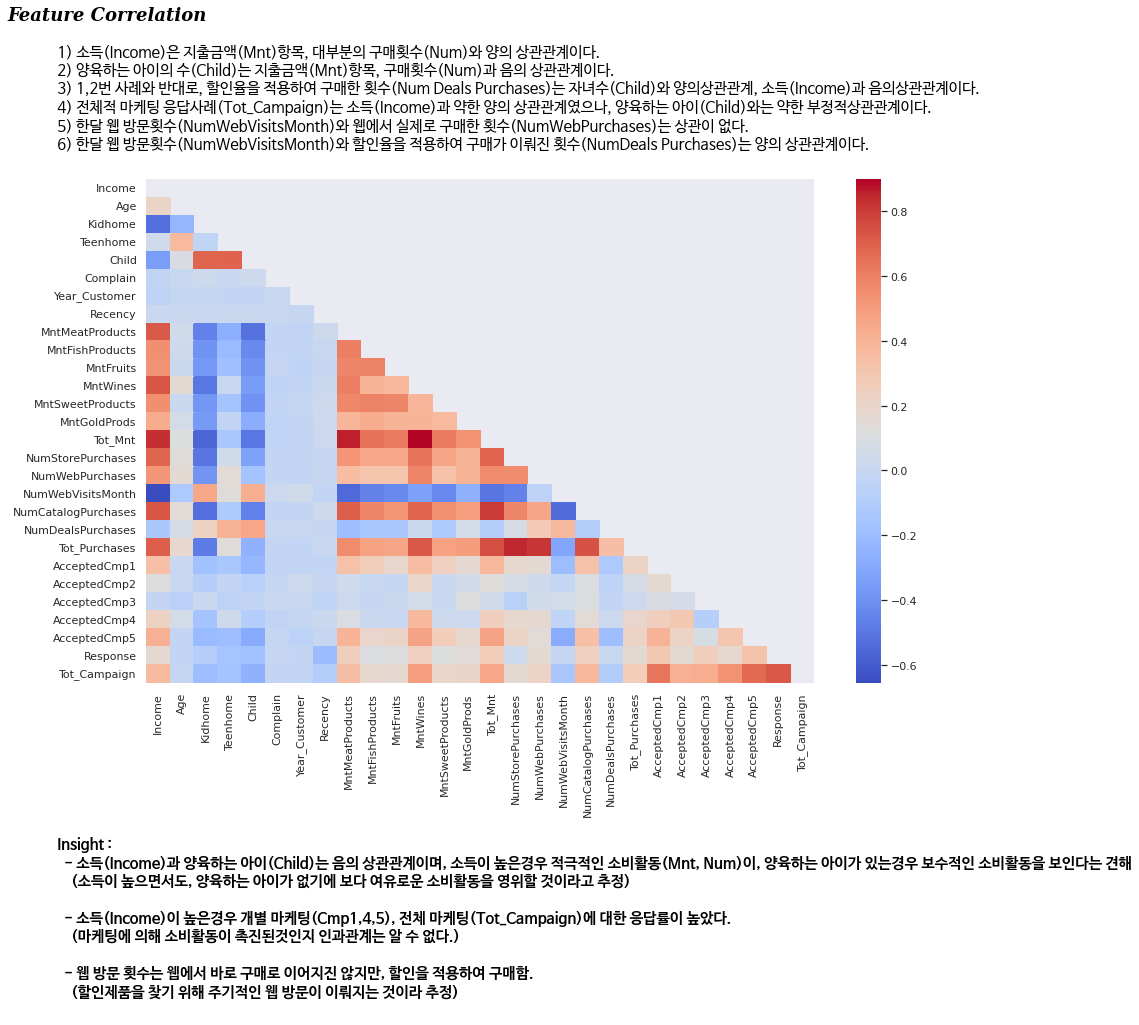

In [103]:
#그래프배경
fig, ax = plt.subplots(1, 1, figsize=(13.8, 18.4))
fig.subplots_adjust(left=0.06, bottom=0., right=0.9, top=0.38, wspace=0.2)

#그래프부문(heatmap)
mask = np.triu(np.ones_like(df_heatmap.corr()))
sns.heatmap(df_heatmap.corr(), cmap="coolwarm", annot=False, mask=mask)

#그래프제목(네모칸)
fig.text(-0.08, 0.5, 'Feature Correlation', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

# 그래프 설명(네모칸 아래)
fig.text(-0.06, 0.39, 
         '''
         1) 소득(Income)은 지출금액(Mnt)항목, 대부분의 구매횟수(Num)와 양의 상관관계이다.
         2) 양육하는 아이의 수(Child)는 지출금액(Mnt)항목, 구매횟수(Num)과 음의 상관관계이다.
         3) 1,2번 사례와 반대로, 할인율을 적용하여 구매한 횟수(Num Deals Purchases)는 자녀수(Child)와 양의상관관계, 소득(Income)과 음의상관관계이다.
         4) 전체적 마케팅 응답사례(Tot_Campaign)는 소득(Income)과 약한 양의 상관관계였으나, 양육하는 아이(Child)와는 약한 부정적상관관계이다.
         5) 한달 웹 방문횟수(NumWebVisitsMonth)와 웹에서 실제로 구매한 횟수(NumWebPurchases)는 상관이 없다.
         6) 한달 웹 방문횟수(NumWebVisitsMonth)와 할인율을 적용하여 구매가 이뤄진 횟수(NumDeals Purchases)는 양의 상관관계이다.
         ''',
        fontsize = 15, fontweight = 'light', fontfamily = 'NanumBarunGothic', color = 'black')

# 그래프 설명(그래프 아래)
fig.text(-0.06, -0.25, 
         '''
         Insight :
           - 소득(Income)과 양육하는 아이(Child)는 음의 상관관계이며, 소득이 높은경우 적극적인 소비활동(Mnt, Num)이, 양육하는 아이가 있는경우 보수적인 소비활동을 보인다는 견해
             (소득이 높으면서도, 양육하는 아이가 없기에 보다 여유로운 소비활동을 영위할 것이라고 추정)
          
           - 소득(Income)이 높은경우 개별 마케팅(Cmp1,4,5), 전체 마케팅(Tot_Campaign)에 대한 응답률이 높았다.
             (마케팅에 의해 소비활동이 촉진된것인지 인과관계는 알 수 없다.)

           - 웹 방문 횟수는 웹에서 바로 구매로 이어지진 않지만, 할인을 적용하여 구매함.
             (할인제품을 찾기 위해 주기적인 웹 방문이 이뤄지는 것이라 추정)
         ''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

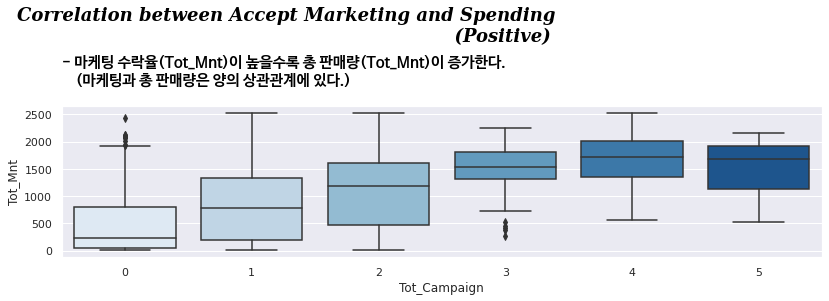

In [104]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

# ax = sns.regplot(x='Tot_Campaign', y='Tot_Mnt', data=df, scatter_kws={"color": "#12a4d9"}, line_kws={"color": "#d9138a"})
sns.boxplot(x='Tot_Campaign', y='Tot_Mnt', data=df)
# ax.set_ylim(-600, max(df.Tot_Mnt)+100)
# ax.set_xlim(min(df.Income), max(df.Income)+5000)
# ax.set_xlabel("Income", fontsize = 15, fontweight = 'bold')
# ax.set_ylabel("Tot_Mnt", fontsize = 15, fontweight = 'bold')

fig.text(0.008, 0.5, '''Correlation between Accept Marketing and Spending
                                                                      (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.4, '''- 마케팅 수락율(Tot_Mnt)이 높을수록 총 판매량(Tot_Mnt)이 증가한다.
    (마케팅과 총 판매량은 양의 상관관계에 있다.)''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

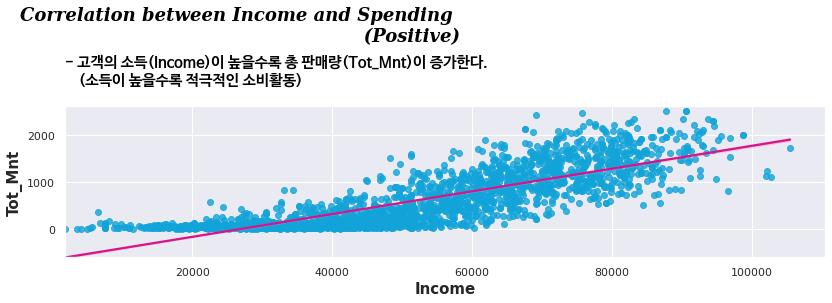

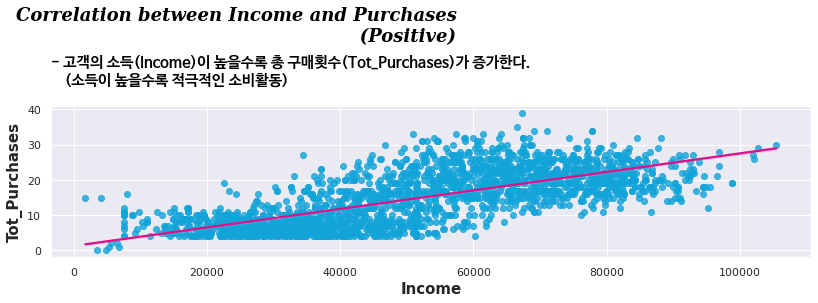

In [105]:
# 1) 소득(Income)은 지출금액(Mnt)항목과 구매횟수(Num)는 양의 상관관계이다.

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)

ax = sns.regplot(x='Income', y='Tot_Mnt', data=df, scatter_kws={"color": "#12a4d9"}, line_kws={"color": "#d9138a"})
ax.set_ylim(-600, max(df.Tot_Mnt)+100)
ax.set_xlim(min(df.Income), max(df.Income)+5000)
ax.set_xlabel("Income", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Tot_Mnt", fontsize = 15, fontweight = 'bold')

fig.text(0.008, 0.5, '''Correlation between Income and Spending
                                                       (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.4, '''- 고객의 소득(Income)이 높을수록 총 판매량(Tot_Mnt)이 증가한다.
    (소득이 높을수록 적극적인 소비활동)''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

##################################

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)

ax = sns.regplot(x='Income', y='Tot_Purchases', data=df, scatter_kws={"color": "#12a4d9"}, line_kws={"color": "#d9138a"})
ax.set_xlabel("Income", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Tot_Purchases", fontsize = 15, fontweight = 'bold')

fig.text(0.02, 0.5, '''Correlation between Income and Purchases
                                                       (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.4, '''- 고객의 소득(Income)이 높을수록 총 구매횟수(Tot_Purchases)가 증가한다.
    (소득이 높을수록 적극적인 소비활동)''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

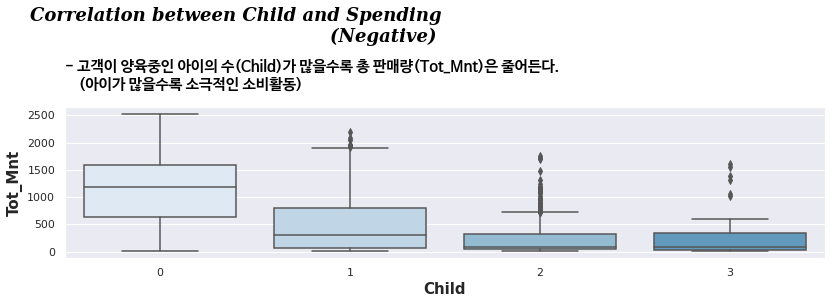

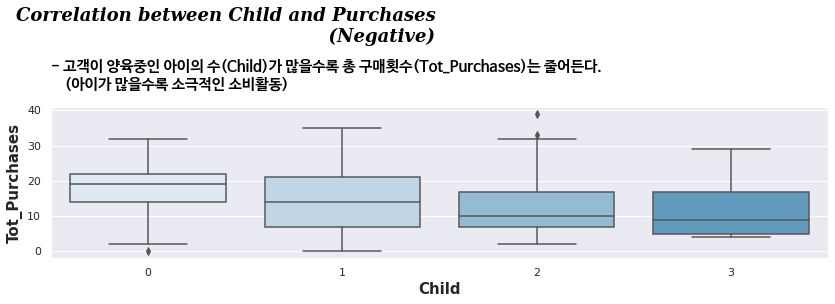

In [106]:
#  2) 양육하는 아이의 수(Child)는 지출금액(Mnt)항목과 음의 상관관계이다.

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Child', y='Tot_Mnt', data=df)
ax.set_xlabel("Child", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Tot_Mnt", fontsize = 15, fontweight = 'bold')

fig.text(0.02, 0.5, '''Correlation between Child and Spending
                                                (Negative)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.35, '''
- 고객이 양육중인 아이의 수(Child)가 많을수록 총 판매량(Tot_Mnt)은 줄어든다.
    (아이가 많을수록 소극적인 소비활동)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")
#########################
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.96, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Child', y='Tot_Purchases', data=df)
ax.set_xlabel("Child", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Tot_Purchases", fontsize = 15, fontweight = 'bold')

fig.text(0.02, 0.5, '''Correlation between Child and Purchases
                                                  (Negative)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.35, '''
- 고객이 양육중인 아이의 수(Child)가 많을수록 총 구매횟수(Tot_Purchases)는 줄어든다.
    (아이가 많을수록 소극적인 소비활동)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

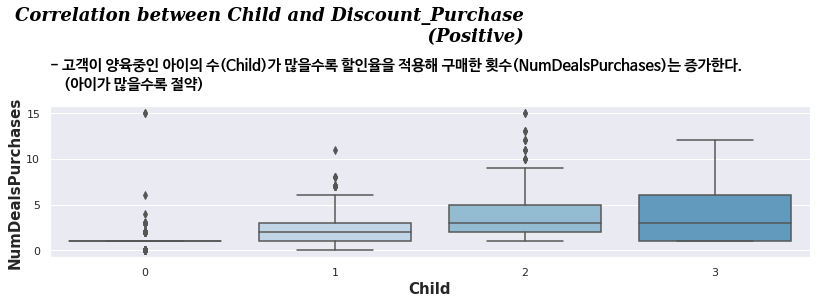

In [107]:
# 3) 1,2번 사례와 반대로, 할인율을 적용하여 구매한 횟수(Num Deals Purchases)는 자녀수(Child)와 양의상관관계이다.

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Child', y='NumDealsPurchases', data=df)

ax.set_xlabel("Child", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("NumDealsPurchases", fontsize = 15, fontweight = 'bold')

fig.text(0.02, 0.5, '''Correlation between Child and Discount_Purchase
                                                                  (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.35, '''
- 고객이 양육중인 아이의 수(Child)가 많을수록 할인율을 적용해 구매한 횟수(NumDealsPurchases)는 증가한다.
    (아이가 많을수록 절약)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

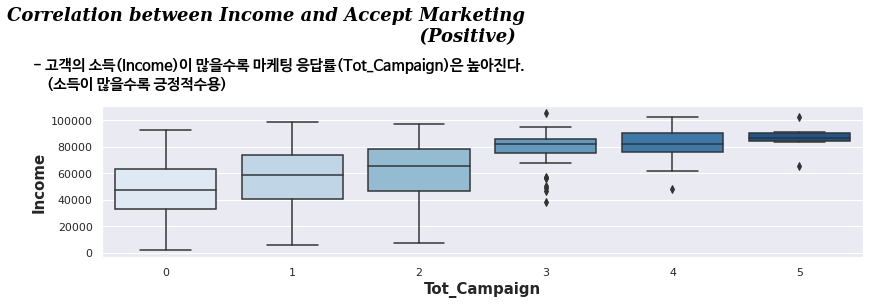

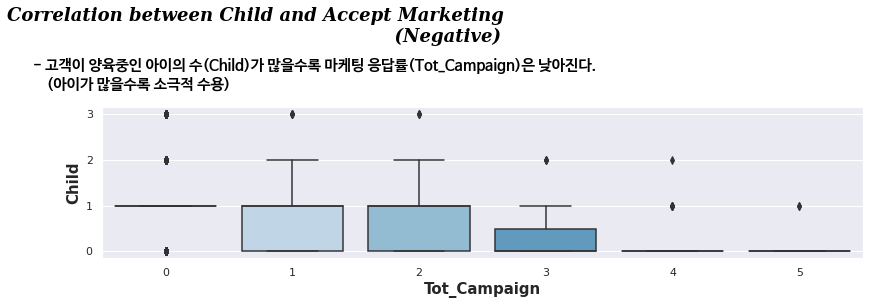

In [108]:
# 4) 전체적 마케팅 응답사례(Tot_Campaign)는 소득(Income)과 약한 양의 상관관계였으나, 양육하는 아이(Child)와는 약한 부정적상관관계이다.

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Tot_Campaign', y='Income', data=df)

ax.set_xlabel("Tot_Campaign", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Income", fontsize = 15, fontweight = 'bold')

fig.text(-0.05, 0.5, '''Correlation between Income and Accept Marketing
                                                                  (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(-0.02, 0.35, '''
- 고객의 소득(Income)이 많을수록 마케팅 응답률(Tot_Campaign)은 높아진다.
    (소득이 많을수록 긍정적수용)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")
####################################

fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Tot_Campaign', y='Child', data=df)

ax.set_xlabel("Tot_Campaign", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Child", fontsize = 15, fontweight = 'bold')

fig.text(-0.05, 0.5, '''Correlation between Child and Accept Marketing
                                                              (Negative)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(-0.02, 0.35, '''
- 고객이 양육중인 아이의 수(Child)가 많을수록 마케팅 응답률(Tot_Campaign)은 낮아진다.
    (아이가 많을수록 소극적 수용)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

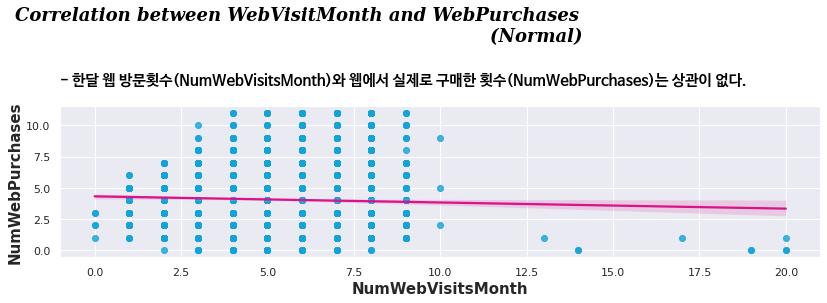

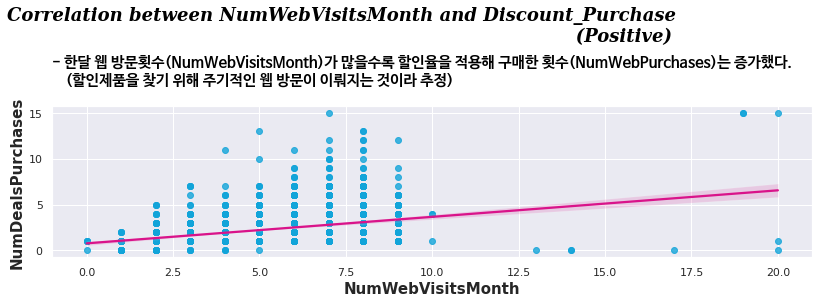

In [109]:
# 5) 한달 웹 방문횟수(NumWebVisitsMonth)와 웹에서 실제로 구매한 횟수(NumWebPurchases)는 상관이 없다.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)

ax = sns.regplot(x='NumWebVisitsMonth', y='NumWebPurchases', data=df, scatter_kws={"color": "#12a4d9"}, line_kws={"color": "#d9138a"})
# ax.set_ylim(-600, max(df.Tot_Mnt)+100)
# ax.set_xlim(min(df.Income), max(df.Income)+5000)
ax.set_xlabel("NumWebVisitsMonth", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("NumWebPurchases", fontsize = 15, fontweight = 'bold')

fig.text(0.008, 0.5, '''Correlation between WebVisitMonth and WebPurchases
                                                                            (Normal)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.4, '- 한달 웹 방문횟수(NumWebVisitsMonth)와 웹에서 실제로 구매한 횟수(NumWebPurchases)는 상관이 없다.',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

###################################

# 6) 한달 웹 방문횟수(NumWebVisitsMonth)와 할인율을 적용하여 구매가 이뤄진 횟수(NumDeals Purchases)는 양의 상관관계이다.
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)

ax = sns.regplot(x='NumWebVisitsMonth', y='NumDealsPurchases', data=df, scatter_kws={"color": "#12a4d9"}, line_kws={"color": "#d9138a"})
# ax.set_ylim(-600, max(df.Tot_Mnt)+100)
# ax.set_xlim(min(df.Income), max(df.Income)+5000)
ax.set_xlabel("NumWebVisitsMonth", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("NumDealsPurchases", fontsize = 15, fontweight = 'bold')

fig.text(0.008, 0.5, '''Correlation between NumWebVisitsMonth and Discount_Purchase
                                                                                           (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.4, '''- 한달 웹 방문횟수(NumWebVisitsMonth)가 많을수록 할인율을 적용해 구매한 횟수(NumWebPurchases)는 증가했다.
    (할인제품을 찾기 위해 주기적인 웹 방문이 이뤄지는 것이라 추정)''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

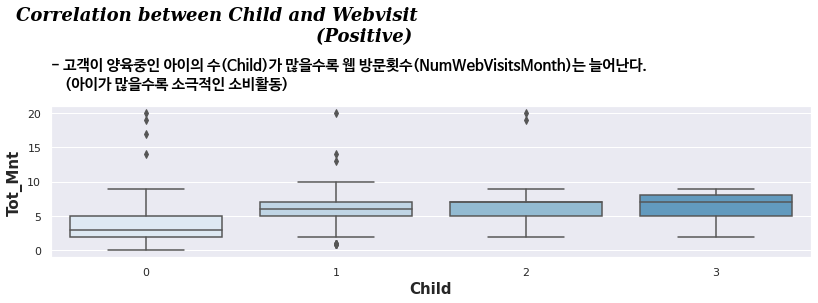

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

ax = sns.boxplot(x='Child', y='NumWebVisitsMonth', data=df)
ax.set_xlabel("Child", fontsize = 15, fontweight = 'bold')
ax.set_ylabel("Tot_Mnt", fontsize = 15, fontweight = 'bold')

fig.text(0.02, 0.5, '''Correlation between Child and Webvisit
                                                (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.35, '''
- 고객이 양육중인 아이의 수(Child)가 많을수록 웹 방문횟수(NumWebVisitsMonth)는 늘어난다.
    (아이가 많을수록 소극적인 소비활동)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

# Part_2 Statistical Analysis

## Part_2.1 Pre-setting before statistical analysis
(Merchine Learning_(Linear regression model))


In [ ]:
# 소비자 습관
# -소득별 구매제품
# -소비자 마케팅 수용률

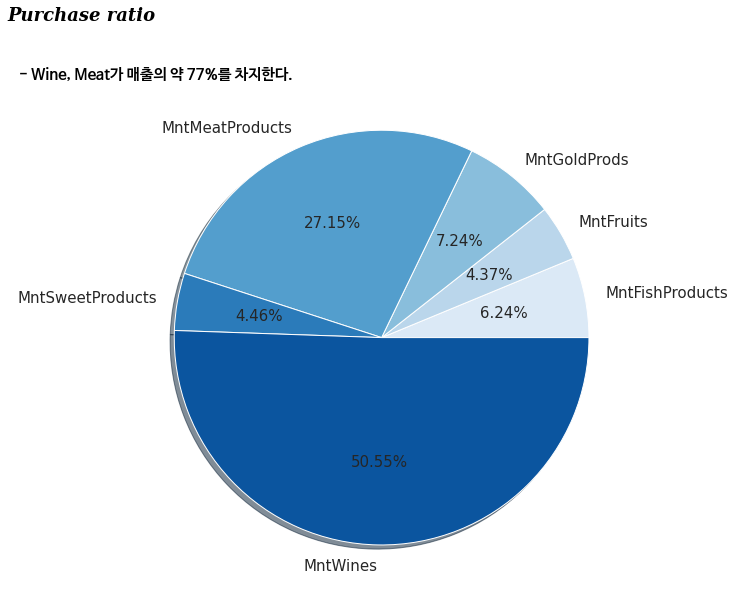

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
fig.subplots_adjust(left=0.05, bottom=0., right=0.7, top=0.45, wspace=0.2)

ax =plt.pie(df[Mnt_columns].mean().values, labels = df[Mnt_columns].mean().index, autopct = '%1.2f%%', 
            shadow = True, textprops={'size' : 15})

fig.text(0.05, 0.5, 'Purchase ratio', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.45, '- Wine, Meat가 매출의 약 77%를 차지한다.',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

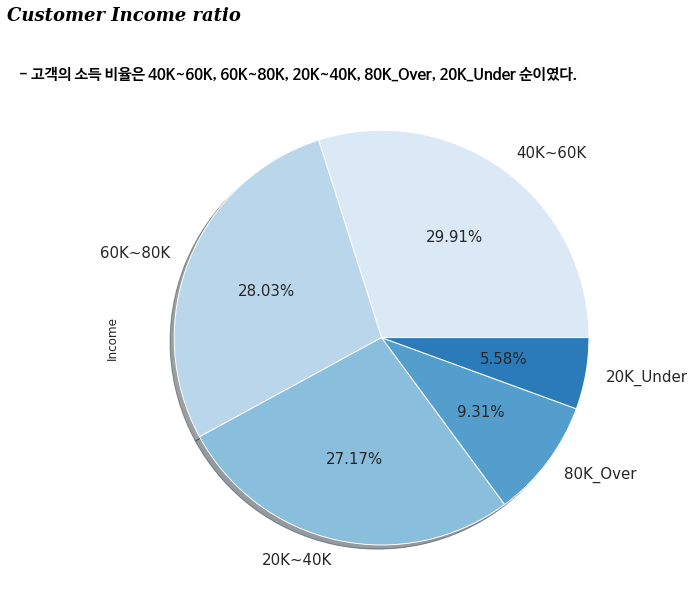

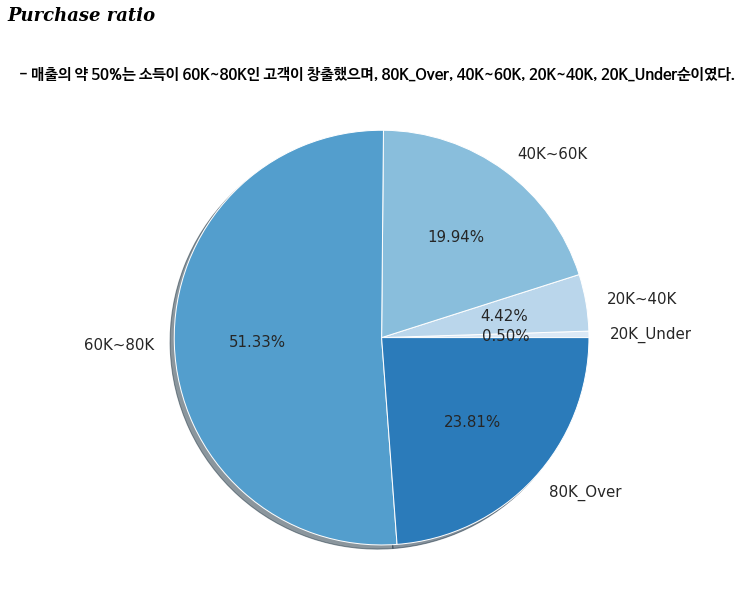

In [ ]:
df2 = df.copy()
df2['Income'] = pd.cut(df2['Income'],
                       [0,20000,40000,60000,80000,110000],labels = ["20K_Under", "20K~40K", "40K~60K", "60K~80K", "80K_Over"])
df2 = df2[["Income", "Tot_Mnt", "Tot_Purchases", "Tot_Campaign"]]

category = df2.select_dtypes(exclude=np.number)
category.nunique()

enc = OneHotEncoder(sparse=False).fit(category)
cat_encoded = pd.DataFrame(enc.transform(category))
cat_encoded.columns = enc.get_feature_names(category.columns)

numeric = df2.drop(columns=category.columns)
df_enc = pd.concat([cat_encoded, numeric], axis=1)

Costomer_rat = df2.Income.value_counts()

fig, ax = plt.subplots(1, 1, figsize=(16, 16))
fig.subplots_adjust(left=0.05, bottom=0., right=0.7, top=0.45, wspace=0.2)

Costomer_rat.plot.pie(autopct='%.2f%%', shadow = True, textprops={'size' : 15})

fig.text(0.05, 0.5, 'Customer Income ratio', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.45, '- 고객의 소득 비율은 40K~60K, 60K~80K, 20K~40K, 80K_Over, 20K_Under 순이였다.',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")
############################
fig, ax = plt.subplots(1, 1, figsize=(16, 16))
fig.subplots_adjust(left=0.05, bottom=0., right=0.7, top=0.45, wspace=0.2)
# print("소득 20K미만 고객 구매액 : ",'$',df[df['Income']<=20000]['Tot_Mnt'].sum())
# print("소득 20K~40K 고객 구매액 : ",'$',df[(df["Income"]>20000) & (df["Income"]<=40000)]['Tot_Mnt'].sum())
# print("소득 40K~60K 고객 구매액 : ",'$',df[(df["Income"]>40000) & (df["Income"]<=60000)]['Tot_Mnt'].sum())
# print("소득 60K~80K 고객 구매액 : ",'$',df[(df["Income"]>60000) & (df["Income"]<=80000)]['Tot_Mnt'].sum())
# print("소득 80K초과 고객 구매액 : ",'$',df[df['Income']>80000]['Tot_Mnt'].sum())

labels = ['20K_Under', '20K~40K', '40K~60K', '60K~80K', '80K_Over']
ratio = [6726/df.Tot_Mnt.sum(), 59402/df.Tot_Mnt.sum(), 268116/df.Tot_Mnt.sum(), 690215/df.Tot_Mnt.sum(), 320194/df.Tot_Mnt.sum()]


ax = plt.pie(ratio, labels=labels, autopct='%1.2f%%', shadow = True, textprops={'size' : 15})

fig.text(0.05, 0.5, 'Purchase ratio', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.06, 0.45, '- 매출의 약 50%는 소득이 60K~80K인 고객이 창출했으며, 80K_Over, 40K~60K, 20K~40K, 20K_Under순이였다.',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

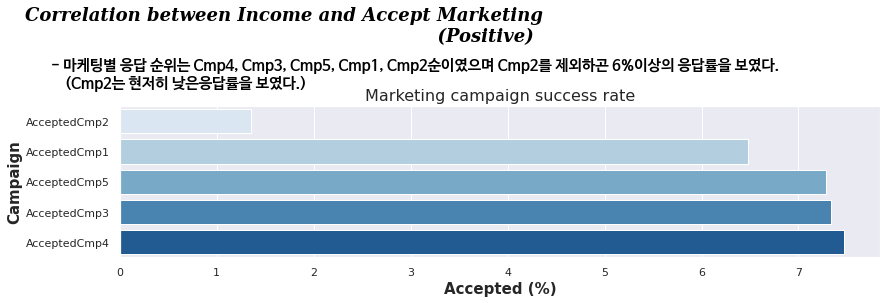

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
fig.subplots_adjust(left=0.06, bottom=0., right=0.94, top=0.35, wspace=0.2)
sns.set_palette('Blues')

cam_success = pd.DataFrame(df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].mean()*100, 
                           columns=['Percent']).reset_index()

# plot
sns.barplot(x='Percent', y='index', data=cam_success.sort_values('Percent'), palette='Blues')
plt.xlabel('Accepted (%)', fontsize = 15, fontweight = 'bold')
plt.ylabel('Campaign', fontsize = 15, fontweight = 'bold')
plt.title('Marketing campaign success rate', size=16);

fig.text(-0.05, 0.5, '''Correlation between Income and Accept Marketing
                                                                  (Positive)''', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(-0.02, 0.35, '''
- 마케팅별 응답 순위는 Cmp4, Cmp3, Cmp5, Cmp1, Cmp2순이였으며 Cmp2를 제외하곤 6%이상의 응답률을 보였다.
    (Cmp2는 현저히 낮은응답률을 보였다.)
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();
print(" ")

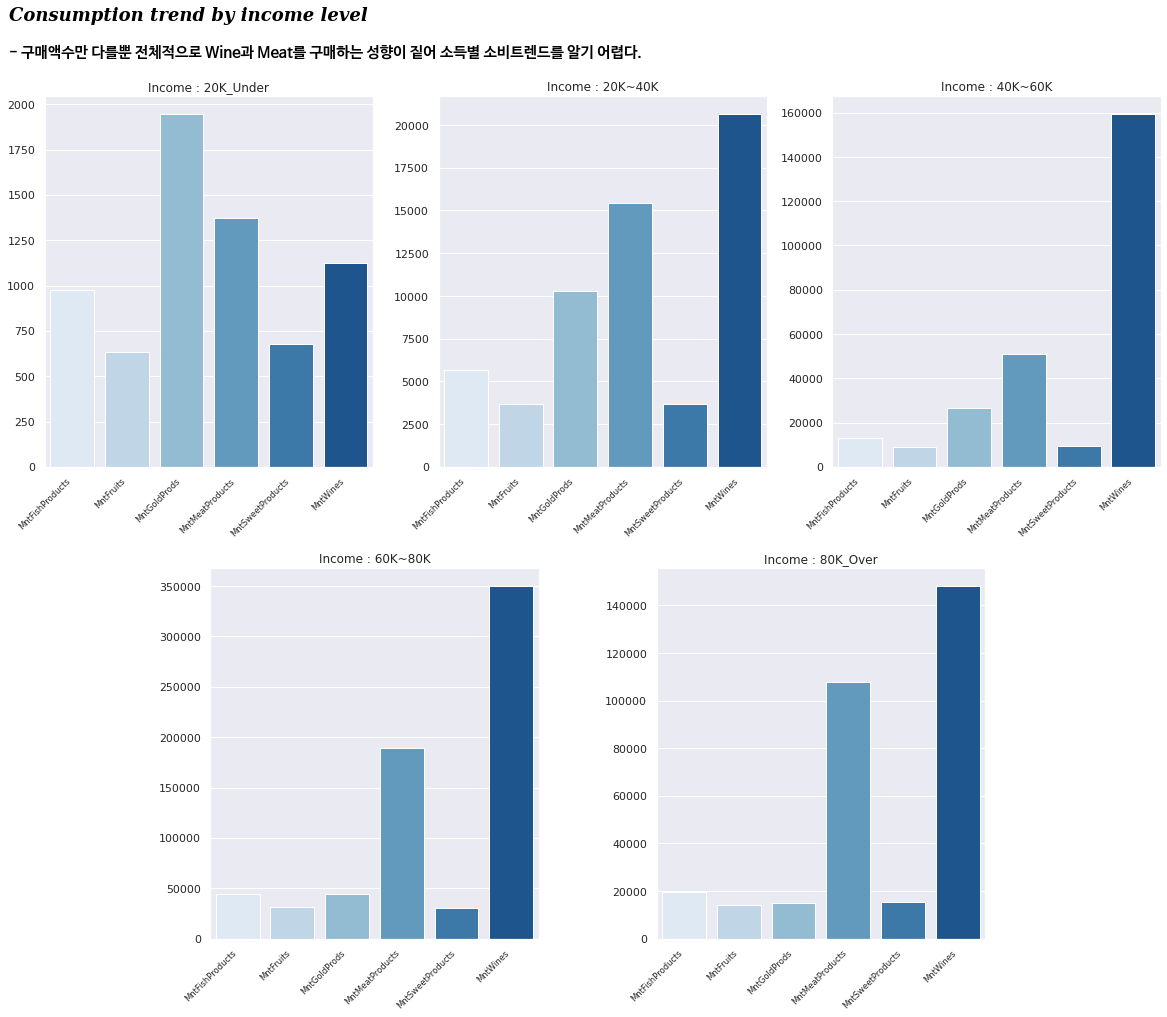

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,15))

ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.1,0.228,0.343])
ax[1][1].set_position([0.55,0.1,0.228,0.343])

ax = ax.flatten()

df_cmp1 = df[df["Income"]<=20000][Mnt_columns]
cmp_success1 = df_cmp1.sum(axis = 0)
cmp_srate1 = df_cmp1.sum(axis = 0) / len(df_cmp1) * 100

cmp1 = sns.barplot(x = df_cmp1.columns, y = cmp_success1.values, ax=ax[0])

cmp1.set_xticklabels(cmp1.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp1.set_title('Income : 20K_Under')

#########

df_cmp2 = df[(df["Income"]>20000) & (df["Income"]<=40000)][Mnt_columns]
cmp_success2 = df_cmp2.sum(axis = 0)
cmp_srate2 = df_cmp2.sum(axis = 0) / len(df_cmp2) * 100

cmp2 = sns.barplot(x = df_cmp2.columns, y = cmp_success2.values, ax=ax[1])

cmp2.set_xticklabels(cmp2.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp2.set_title('Income : 20K~40K')

##########

df_cmp3 = df[(df["Income"]>40000) & (df["Income"]<=60000)][Mnt_columns]
cmp_success3 = df_cmp3.sum(axis = 0)
cmp_srate3 = df_cmp3.sum(axis = 0) / len(df_cmp3) * 100

cmp3 = sns.barplot(x = df_cmp3.columns, y = cmp_success3.values, ax=ax[2])

cmp3.set_xticklabels(cmp3.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp3.set_title('Income : 40K~60K')

##########

df_cmp4 = df[(df["Income"]>60000) & (df["Income"]<=80000)][Mnt_columns]
cmp_success4 = df_cmp4.sum(axis = 0)
cmp_srate4 = df_cmp4.sum(axis = 0) / len(df_cmp4) * 100

cmp4 = sns.barplot(x = df_cmp4.columns, y = cmp_success4.values, ax=ax[3])

cmp4.set_xticklabels(cmp4.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp4.set_title('Income : 60K~80K')

##########

df_cmp5 = df[df["Income"]>=80000][Mnt_columns]
cmp_success5 = df_cmp5.sum(axis = 0)
cmp_srate5 = df_cmp5.sum(axis = 0) / len(df_cmp5) * 100

cmp5 =sns.barplot(x = df_cmp5.columns, y = cmp_success5.values, ax=ax[4])

cmp5.set_xticklabels(cmp5.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp5.set_title('Income : 80K_Over')

fig.text(0.1, 0.95, 'Consumption trend by income level', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.1, 0.90, '''
- 구매액수만 다를뿐 전체적으로 Wine과 Meat를 구매하는 성향이 짙어 소득별 소비트렌드를 알기 어렵다.
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

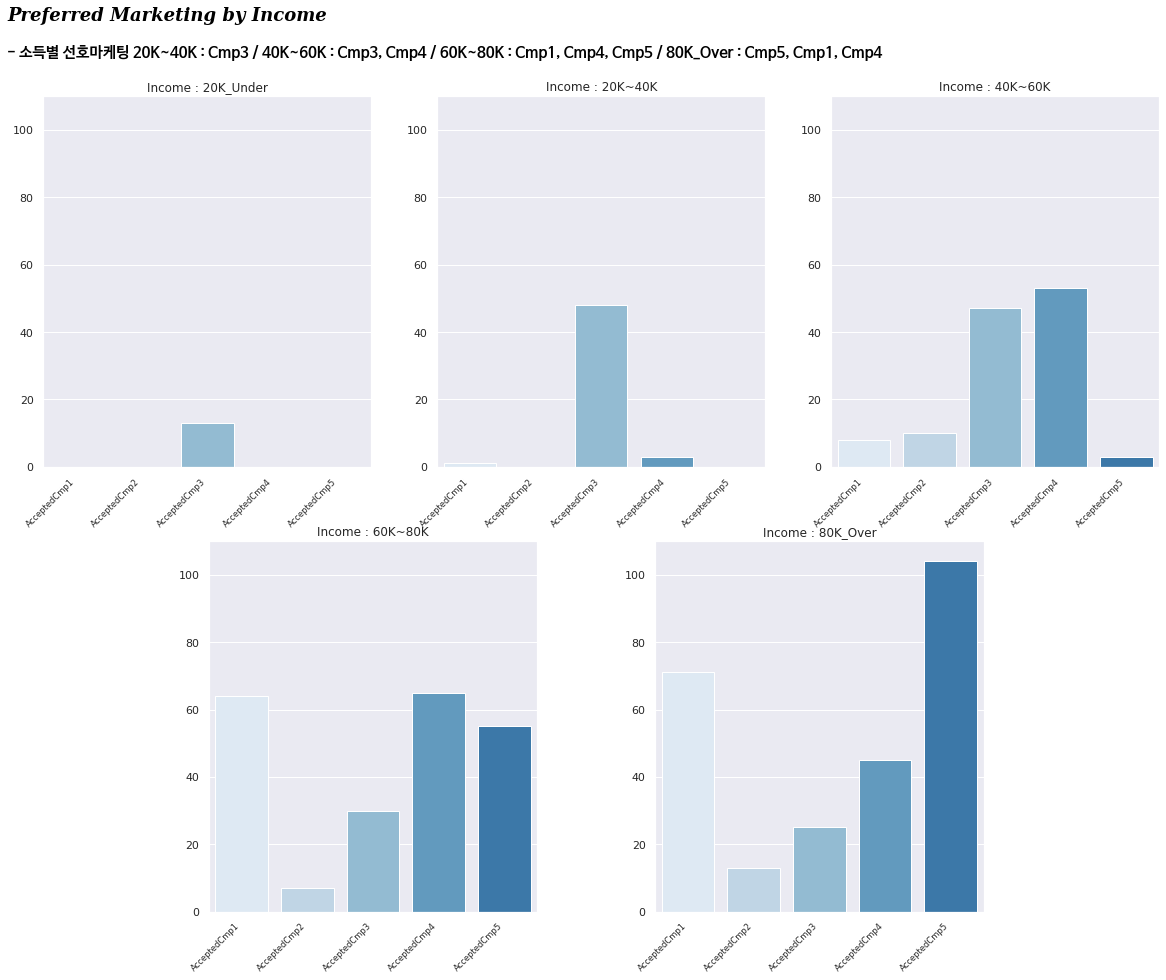

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,15))

ax[1][2].set_visible(False)
ax[1][0].set_position([0.24,0.125,0.228,0.343])
ax[1][1].set_position([0.55,0.125,0.228,0.343])

ax = ax.flatten()

df_cmp1 = df[df["Income"]<=20000][campaigns_cols[0:5]]
cmp_success1 = df_cmp1.sum(axis = 0)
cmp_srate1 = df_cmp1.sum(axis = 0) / len(df_cmp1) * 100

cmp1 = sns.barplot(x = df_cmp1.columns, y = cmp_success1.values, ax=ax[0])

cmp1.set_xticklabels(cmp1.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp1.set_ylim(bottom = 0, top = 110)
cmp1.set_title('Income : 20K_Under')

#########

df_cmp2 = df[(df["Income"]>20000) & (df["Income"]<=40000)][campaigns_cols[0:5]]
cmp_success2 = df_cmp2.sum(axis = 0)
cmp_srate2 = df_cmp2.sum(axis = 0) / len(df_cmp2) * 100

cmp2 = sns.barplot(x = df_cmp2.columns, y = cmp_success2.values, ax=ax[1])

cmp2.set_xticklabels(cmp2.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp2.set_ylim(bottom = 0, top = 110)
cmp2.set_title('Income : 20K~40K')

##########

df_cmp3 = df[(df["Income"]>40000) & (df["Income"]<=60000)][campaigns_cols[0:5]]
cmp_success3 = df_cmp3.sum(axis = 0)
cmp_srate3 = df_cmp3.sum(axis = 0) / len(df_cmp3) * 100

cmp3 = sns.barplot(x = df_cmp3.columns, y = cmp_success3.values, ax=ax[2])

cmp3.set_xticklabels(cmp3.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp3.set_ylim(bottom = 0, top = 110)
cmp3.set_title('Income : 40K~60K')

##########

df_cmp4 = df[(df["Income"]>60000) & (df["Income"]<=80000)][campaigns_cols[0:5]]
cmp_success4 = df_cmp4.sum(axis = 0)
cmp_srate4 = df_cmp4.sum(axis = 0) / len(df_cmp4) * 100

cmp4 = sns.barplot(x = df_cmp4.columns, y = cmp_success4.values, ax=ax[3])

cmp4.set_xticklabels(cmp4.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp4.set_ylim(bottom = 0, top = 110)
cmp4.set_title('Income : 60K~80K')

##########

df_cmp5 = df[df["Income"]>=80000][campaigns_cols[0:5]]
cmp_success5 = df_cmp5.sum(axis = 0)
cmp_srate5 = df_cmp5.sum(axis = 0) / len(df_cmp5) * 100

cmp5 =sns.barplot(x = df_cmp5.columns, y = cmp_success5.values, ax=ax[4])

cmp5.set_xticklabels(cmp5.get_xticklabels(), rotation=45,
                  horizontalalignment='right',
                  fontweight='light',
                  fontsize='x-small'
                 )
cmp5.set_ylim(bottom = 0, top = 110)
cmp5.set_title('Income : 80K_Over')

fig.text(0.1, 0.95, 'Preferred Marketing by Income', 
        fontsize = 18, fontweight = 'bold', fontfamily = 'serif', color = 'black',
        bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10}, style = 'italic')

fig.text(0.1, 0.90, '''
- 소득별 선호마케팅 20K~40K : Cmp3 / 40K~60K : Cmp3, Cmp4 / 60K~80K : Cmp1, Cmp4, Cmp5 / 80K_Over : Cmp5, Cmp1, Cmp4
''',
        fontsize = 15, fontweight = 'bold', fontfamily = 'NanumBarunGothic', color = 'black')

plt.show();

In [ ]:
# 선형회귀모델로 마케팅별 판매장려제품 확인

In [ ]:
# AcceptedCmp1 마케팅 판매제품 비중
X = df[Mnt_columns]
y = df["AcceptedCmp1"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  0.22093635649911733
Median value of target variable:  0.0


In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Weight,Feature
0.1195 ± 0.0388,MntWines
0.0284 ± 0.0181,MntMeatProducts
0.0122 ± 0.0089,MntFishProducts
0.0105 ± 0.0047,MntFruits
-0.0025 ± 0.0012,MntSweetProducts
-0.0033 ± 0.0024,MntGoldProds


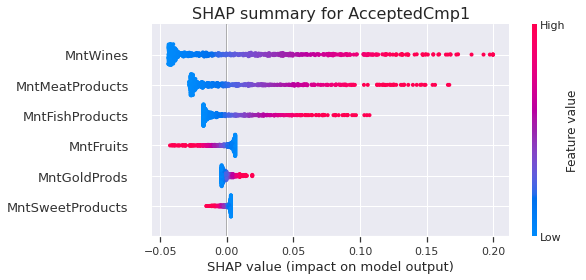

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for AcceptedCmp1', size=16)
shap.plots.beeswarm(shap_values, max_display=8);

In [ ]:
# AcceptedCmp2 마케팅 판매제품 비중
X = df[Mnt_columns]
y = df["AcceptedCmp2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  0.12236118048504398
Median value of target variable:  0.0


In [ ]:
perm = PermutationImportance(model, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Weight,Feature
0.1127 ± 0.0260,MntWines
0.0061 ± 0.0026,MntFruits
0.0024 ± 0.0047,MntFishProducts
0.0009 ± 0.0045,MntSweetProducts
0.0006 ± 0.0021,MntGoldProds
-0.0004 ± 0.0007,MntMeatProducts


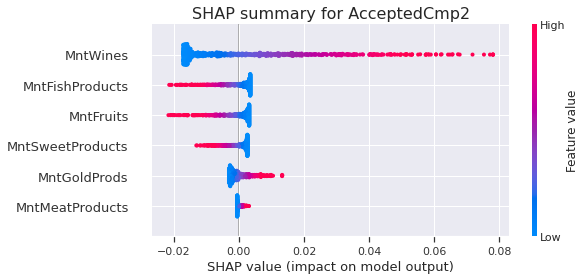

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for AcceptedCmp2', size=16)
shap.plots.beeswarm(shap_values, max_display=8);

In [ ]:
# AcceptedCmp3 마케팅 판매제품 비중
X = df[Mnt_columns]
y = df["AcceptedCmp3"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  0.2723818826662305
Median value of target variable:  0.0


In [ ]:
perm = PermutationImportance(model, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Weight,Feature
0.0420 ± 0.0116,MntGoldProds
0.0036 ± 0.0140,MntWines
0.0023 ± 0.0084,MntSweetProducts
0.0015 ± 0.0051,MntFishProducts
-0.0005 ± 0.0014,MntFruits
-0.0016 ± 0.0037,MntMeatProducts


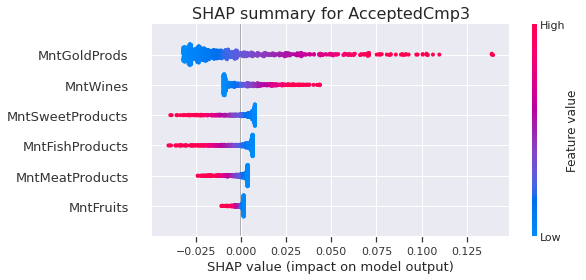

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for AcceptedCmp3', size=16)
shap.plots.beeswarm(shap_values, max_display=8);

In [ ]:
# AcceptedCmp4 마케팅 판매제품 비중
X = df[Mnt_columns]
y = df["AcceptedCmp4"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  0.2510888492793618
Median value of target variable:  0.0


In [ ]:
perm = PermutationImportance(model, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Weight,Feature
0.4831 ± 0.0622,MntWines
0.0095 ± 0.0059,MntMeatProducts
0.0085 ± 0.0058,MntGoldProds
0.0054 ± 0.0054,MntFruits
0.0039 ± 0.0046,MntFishProducts
0.0011 ± 0.0039,MntSweetProducts


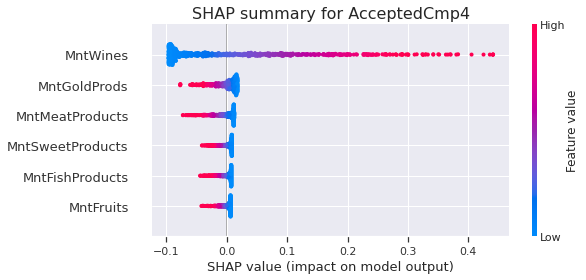

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for AcceptedCmp4', size=16)
shap.plots.beeswarm(shap_values, max_display=8);

In [ ]:
# AcceptedCmp5 마케팅 판매제품 비중
X = df[Mnt_columns]
y = df["AcceptedCmp5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Modeling
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  0.24211916912546425
Median value of target variable:  0.0


In [ ]:
perm = PermutationImportance(model, random_state=2).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

Weight,Feature
0.2586 ± 0.0706,MntWines
0.0819 ± 0.0247,MntMeatProducts
0.0125 ± 0.0063,MntSweetProducts
0.0108 ± 0.0146,MntFishProducts
0.0003 ± 0.0012,MntFruits
-0.0008 ± 0.0013,MntGoldProds


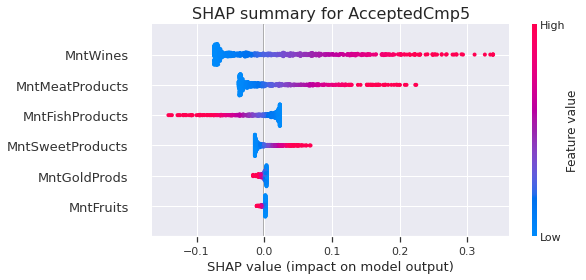

In [ ]:
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

plt.title('SHAP summary for AcceptedCmp5', size=16)
shap.plots.beeswarm(shap_values, max_display=8);

    마케팅별 특성 확인 결과 
    AcceptedCmp1 : Wines, Meat, Fish 매출에 영향을 주었다.
    AcceptedCmp2 : Wines와 Gold 매출에 영향을 주었다.
    AcceptedCmp3 : Gold와 Wines 매출에 영향을 주었다.
    AcceptedCmp4 : Wines 매출에 영향을 주었다.
    AcceptedCmp5 : Wines, Meat, Sweet 매출에 영향을 주었다.